<a href="https://colab.research.google.com/github/agnislur/Confused-eeg-Classification-Accuracy-Improvement./blob/main/DSW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from google.colab import files
uploaded = files.upload()

Saving Telco_customer_churn_adapted_v2 - Sheet1.csv to Telco_customer_churn_adapted_v2 - Sheet1.csv


In [2]:
df=pd.read_csv("Telco_customer_churn_adapted_v2 - Sheet1.csv")
df

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,"70,005",Yes,"106,81667","-6,20000","4210,7"
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,"91,91",Yes,"106,81667","-6,20000","3511,3"
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,"129,545",Yes,"106,81667","-6,20000","6983,6"
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,"136,24",Yes,"106,81667","-6,20000","6503,9"
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,"134,81",Yes,"106,81667","-6,20000",6942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,72,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Debit,"27,495",No,"106,81667","-6,20000","6897,8"
7039,7039,24,Jakarta,Mid End,Yes,No,Yes,Yes,Yes,Yes,Digital Wallet,"110,24",No,"106,81667","-6,20000",2782
7040,7040,72,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Credit,"134,16",No,"106,81667","-6,20000",7228
7041,7041,11,Jakarta,Mid End,Yes,No,No,No,No,No,Pulsa,"38,48",No,"106,81667","-6,20000","3630,9"


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Customer ID                   7043 non-null   int64  
 1   Tenure Months                 7043 non-null   int64  
 2   Location                      7043 non-null   object 
 3   Device Class                  7043 non-null   object 
 4   Games Product                 7043 non-null   object 
 5   Music Product                 7043 non-null   object 
 6   Education Product             7043 non-null   object 
 7   Call Center                   7043 non-null   object 
 8   Video Product                 7043 non-null   object 
 9   Use MyApp                     7043 non-null   object 
 10  Payment Method                7043 non-null   object 
 11  Monthly Purchase (Thou. IDR)  7043 non-null   float64
 12  Churn Label                   7043 non-null   object 
 13  Lon

In [5]:
df['CLTV (Predicted Thou. IDR)'] = df['CLTV (Predicted Thou. IDR)'].str.replace(',', '.')
df['Monthly Purchase (Thou. IDR)'] = df['Monthly Purchase (Thou. IDR)'].str.replace(',', '.')
print(df)

      Customer ID  Tenure Months Location Device Class        Games Product  \
0               0              2  Jakarta      Mid End                  Yes   
1               1              2  Jakarta     High End                   No   
2               2              8  Jakarta     High End                   No   
3               3             28  Jakarta     High End                   No   
4               4             49  Jakarta     High End                   No   
...           ...            ...      ...          ...                  ...   
7038         7038             72  Jakarta      Low End  No internet service   
7039         7039             24  Jakarta      Mid End                  Yes   
7040         7040             72  Jakarta     High End                   No   
7041         7041             11  Jakarta      Mid End                  Yes   
7042         7042             66  Jakarta     High End                  Yes   

            Music Product    Education Product Call

In [6]:
df['CLTV (Predicted Thou. IDR)'] = df['CLTV (Predicted Thou. IDR)'].astype(float)
df['Monthly Purchase (Thou. IDR)'] = df['Monthly Purchase (Thou. IDR)'].astype(float)

print(df)


      Customer ID  Tenure Months Location Device Class        Games Product  \
0               0              2  Jakarta      Mid End                  Yes   
1               1              2  Jakarta     High End                   No   
2               2              8  Jakarta     High End                   No   
3               3             28  Jakarta     High End                   No   
4               4             49  Jakarta     High End                   No   
...           ...            ...      ...          ...                  ...   
7038         7038             72  Jakarta      Low End  No internet service   
7039         7039             24  Jakarta      Mid End                  Yes   
7040         7040             72  Jakarta     High End                   No   
7041         7041             11  Jakarta      Mid End                  Yes   
7042         7042             66  Jakarta     High End                  Yes   

            Music Product    Education Product Call

In [7]:
df.describe()

,Customer ID,Tenure Months,Monthly Purchase (Thou. IDR),CLTV (Predicted Thou. IDR)
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,32.371149,84.190200,5720.384481
std,2033.283305,24.559481,39.117061,1537.974298
min,0.000000,0.000000,23.725000,2603.900000
25%,1760.500000,9.000000,46.150000,4509.700000
50%,3521.000000,29.000000,91.455000,5885.100000
75%,5281.500000,55.000000,116.805000,6994.650000
max,7042.000000,72.000000,154.375000,8450.000000


In [8]:
df

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,"106,81667","-6,20000",4210.7
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,"106,81667","-6,20000",3511.3
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,"106,81667","-6,20000",6983.6
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,"106,81667","-6,20000",6503.9
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,"106,81667","-6,20000",6942.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,72,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Debit,27.495,No,"106,81667","-6,20000",6897.8
7039,7039,24,Jakarta,Mid End,Yes,No,Yes,Yes,Yes,Yes,Digital Wallet,110.240,No,"106,81667","-6,20000",2782.0
7040,7040,72,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Credit,134.160,No,"106,81667","-6,20000",7228.0
7041,7041,11,Jakarta,Mid End,Yes,No,No,No,No,No,Pulsa,38.480,No,"106,81667","-6,20000",3630.9


Tenure Months: menghitung berapa lama pengguna menggunakan jasa telekomunikasi sampai quartal data tersebut

In [5]:

# Loop melalui semua kolom dan mencari nilai unik
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Kolom '{column}':")
    print(unique_values)
    print()


Kolom 'Customer ID':
[   0    1    2 ... 7040 7041 7042]

Kolom 'Tenure Months':
[ 2  8 28 49 10  1 47 17  5 34 11 15 18  9  7 12 25 68 55 37  3 27 20  4
 58 53 13  6 19 59 16 52 24 32 38 54 43 63 21 69 22 61 60 48 40 23 39 35
 56 65 33 30 45 46 62 70 50 44 71 26 14 41 66 64 29 42 67 51 31 57 36 72
  0]

Kolom 'Location':
['Jakarta' 'Bandung']

Kolom 'Device Class':
['Mid End' 'High End' 'Low End']

Kolom 'Games Product':
['Yes' 'No' 'No internet service']

Kolom 'Music Product':
['Yes' 'No' 'No internet service']

Kolom 'Education Product':
['No' 'Yes' 'No internet service']

Kolom 'Call Center':
['No' 'Yes']

Kolom 'Video Product':
['No' 'Yes' 'No internet service']

Kolom 'Use MyApp':
['No' 'Yes' 'No internet service']

Kolom 'Payment Method':
['Digital Wallet' 'Pulsa' 'Debit' 'Credit']

Kolom 'Monthly Purchase (Thou. IDR)':
['70,005' '91,91' '129,545' ... '140,855' '82,03' '102,31']

Kolom 'Churn Label':
['Yes' 'No']

Kolom 'Longitude':
['106,81667' '107,60981']

Kolom 'Latitude':


In [6]:
df.isnull().sum()

Customer ID                     0
Tenure Months                   0
Location                        0
Device Class                    0
Games Product                   0
Music Product                   0
Education Product               0
Call Center                     0
Video Product                   0
Use MyApp                       0
Payment Method                  0
Monthly Purchase (Thou. IDR)    0
Churn Label                     0
Longitude                       0
Latitude                        0
CLTV (Predicted Thou. IDR)      0
dtype: int64

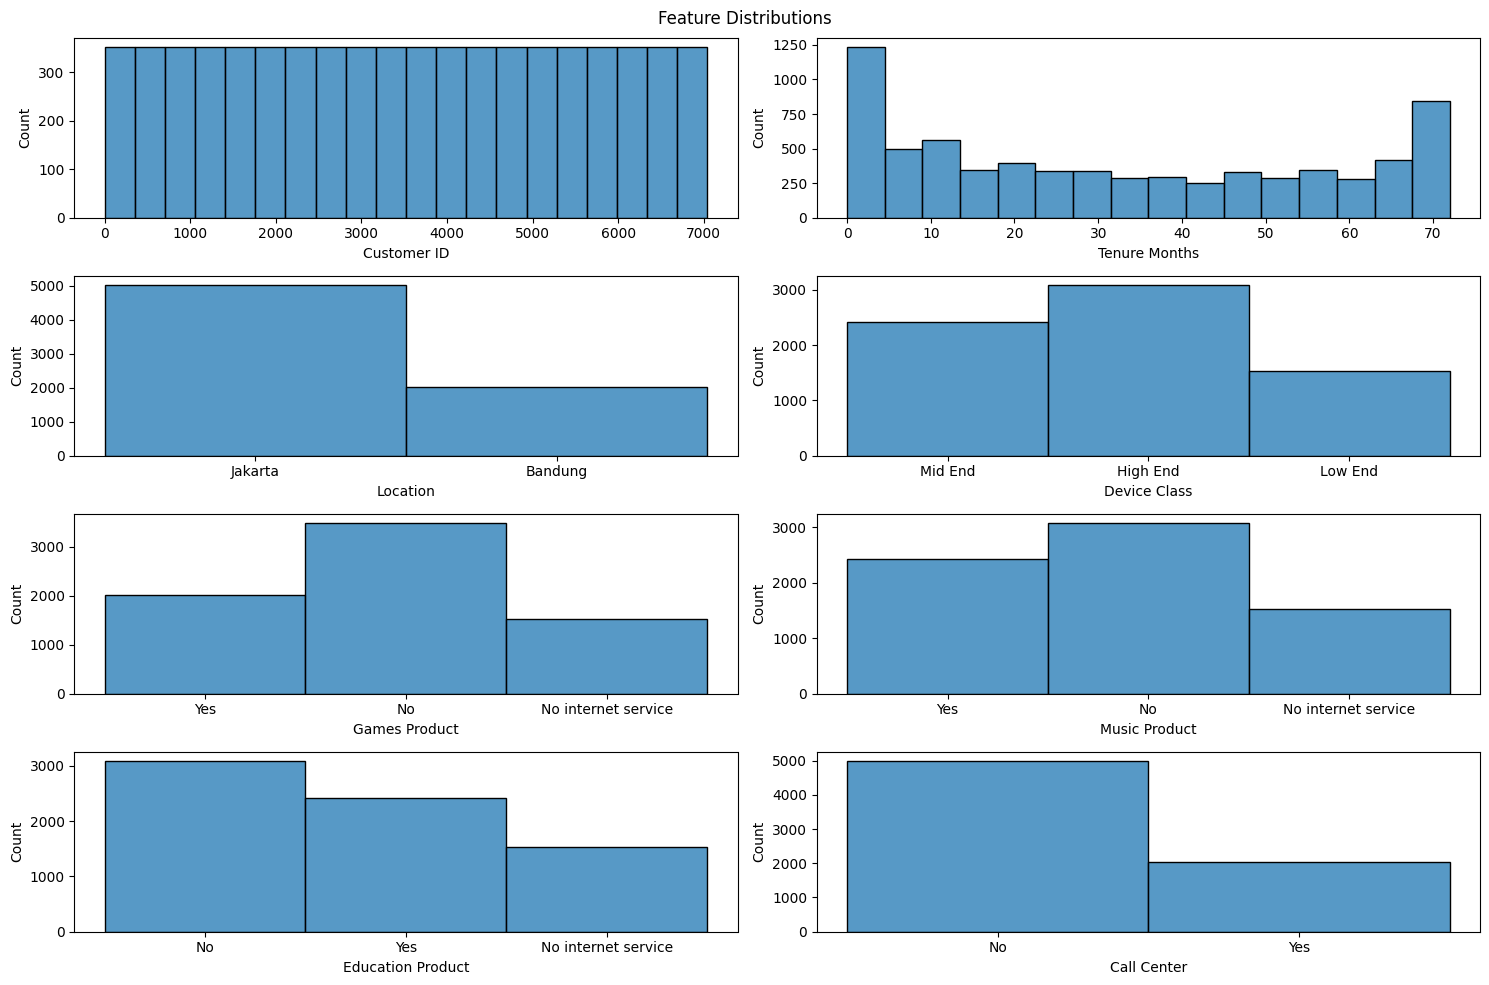

In [10]:

n_rows = 4
n_cols = 2
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15,10))

for i in range(n_rows):
  for j in range(n_cols):
    feature = df.columns[i*n_cols+j]
    sns.histplot(x=df[feature], ax=axs[i][j])

fig.suptitle("Feature Distributions")
fig.tight_layout()
fig.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


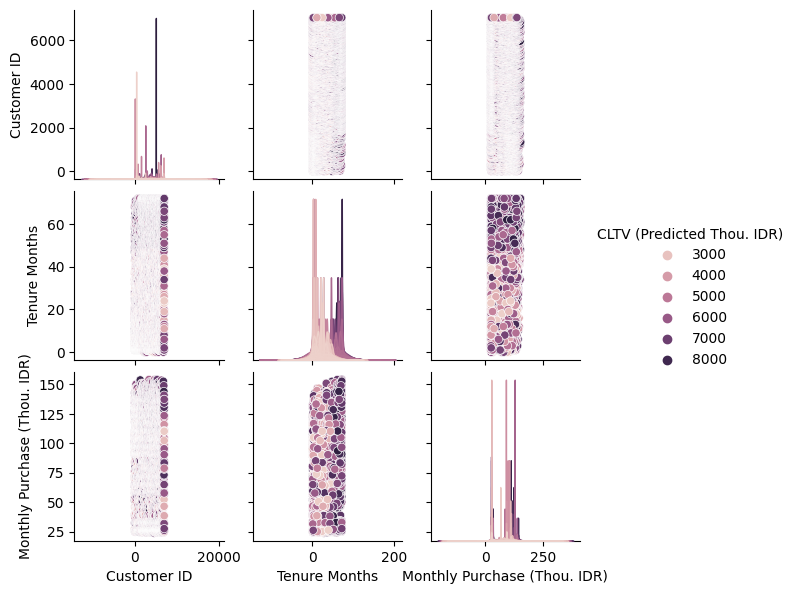

In [11]:
sns.pairplot(df, hue="CLTV (Predicted Thou. IDR)", size=2)
plt.show()

In [12]:
sns.countplot(data=df, x="CLTV (Predicted Thou. IDR)", hue="Monthly Purchase (Thou. IDR)")
plt.title("Effect of Critical Component on Category")
plt.show()

KeyboardInterrupt: ignored

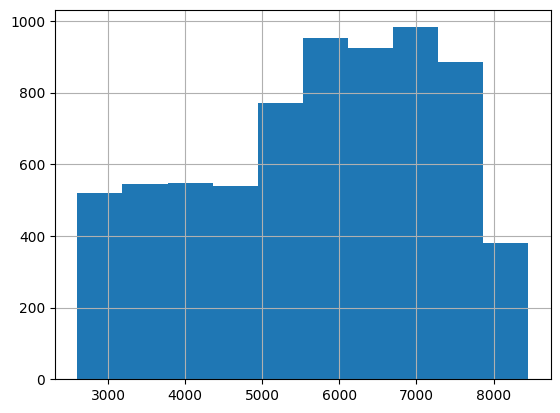

In [13]:
df["CLTV (Predicted Thou. IDR)"].hist()
plt.show()
